In [28]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, KBinsDiscretizer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pickle


## Load Dataset

In [29]:
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

## Data Exploration

In [30]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [31]:
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
df.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [37]:
df.duplicated().sum()

0

In [38]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [39]:
df["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [40]:
df.shape

(7043, 21)

## Plotting

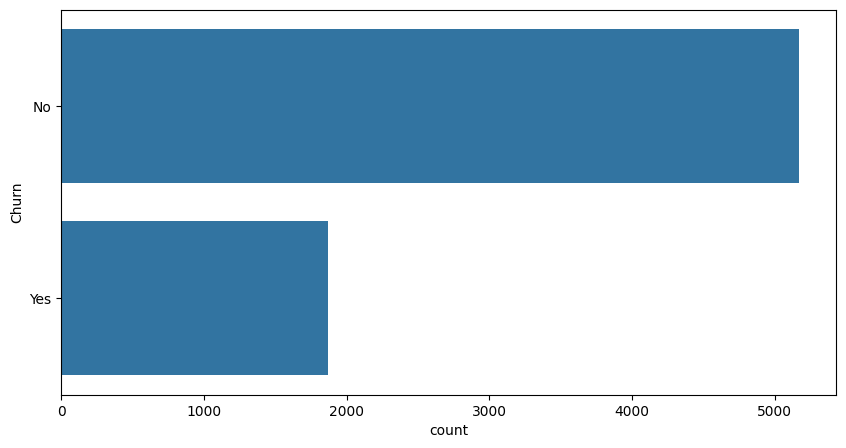

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(df['Churn'])
plt.show()

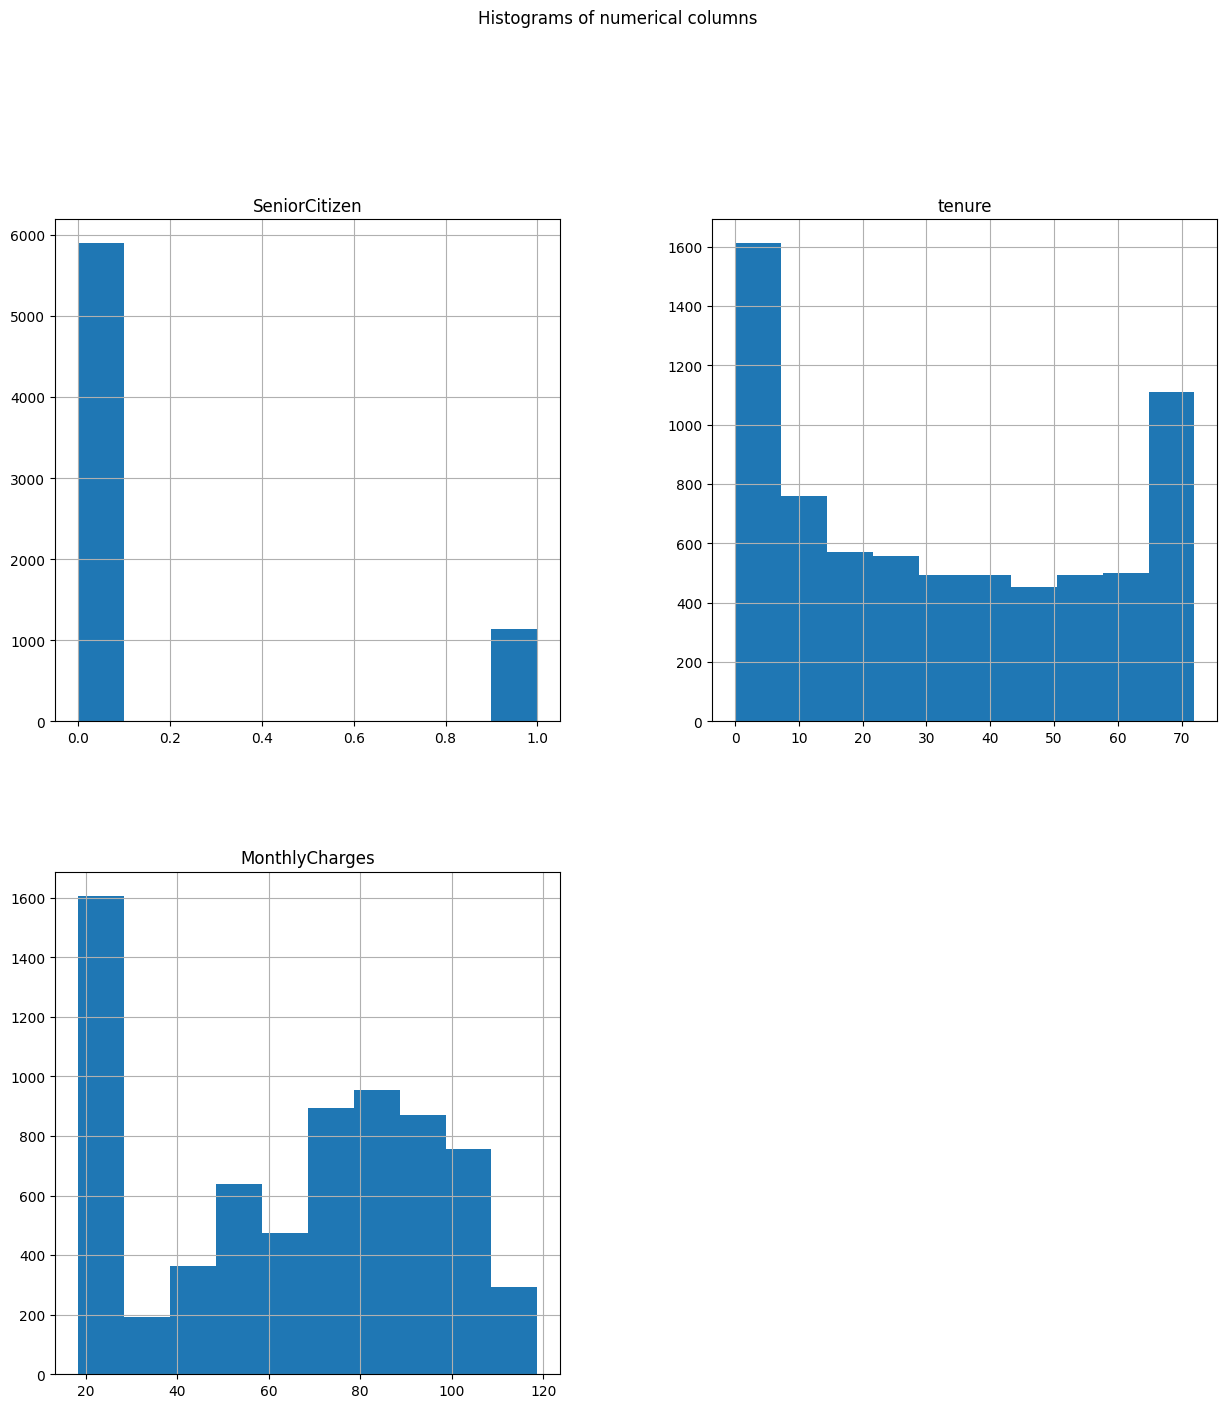

In [42]:
df.drop(['Churn'], axis=1).hist(figsize=(15,15))
plt.suptitle('Histograms of numerical columns', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

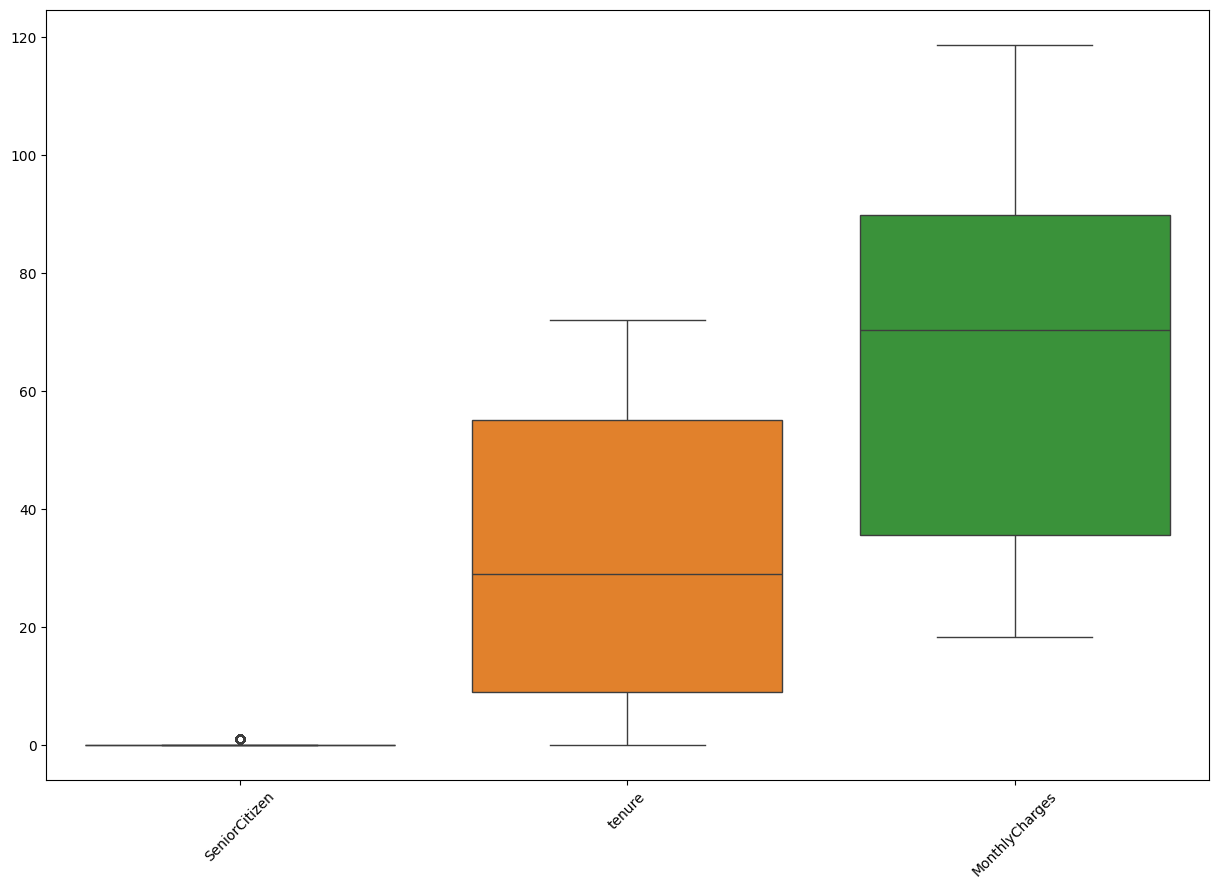

In [43]:
# boxplot of numerical columns
plt.figure(figsize=(15,10))
sns.boxplot(data=df.drop(['Churn'], axis=1))
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

### Remove unnecessary columns

In [44]:
df.drop(['customerID'], axis=1, inplace=True)

### Change data type

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [46]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [47]:
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Encode the columns
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [48]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [49]:
df[df["PaymentMethod"] == 2]

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
4          0              0        0           0       2             1   
5          0              0        0           0       8             1   
8          0              0        1           0      28             1   
14         1              0        0           0      25             1   
...      ...            ...      ...         ...     ...           ...   
7023       0              1        1           0      63             1   
7029       0              1        0           0       6             0   
7032       1              1        0           0       1             1   
7036       0              0        0           0      12             0   
7040       0              0        1           1      11             0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
4                 0                1               0             0   
5                 2                1               0             0   
8                 2                1               0             0   
14                0                1               2             0   
...             ...              ...             ...           ...   
7023              2                1               0             2   
7029              1                0               0             0   
7032              2                1               0             0   
7036              1                0               0             2   
7040              1                0               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
4                    0            0            0                0         0   
5                    2            0            2                2         0   
8                    2            2            2                2         0   
14                   2            2            2                2         0   
...                ...          ...          ...              ...       ...   
7023                 2            0            2                2         0   
7029                 0            0            2                2         0   
7032                 0            0            0                0         0   
7036                 2            2            2                2         1   
7040                 0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2           29.85         29.85      0  
4                    1              2           70.70        151.65      1  
5                    1              2           99.65        820.50      1  
8                    1              2          104.80       3046.05      1  
14                   1              2          105.50       2686.05      0  
...                ...            ...             ...           ...    ...  
7023                 1              2          103.50       6479.40      0  
7029                 1              2           44.40        263.05      0  
7032                 1              2           75.75         75.75      1  
7036                 0              2           60.65        743.30      0  
7040                 1              2           29.60        346.45      0  

[2365 rows x 20 columns]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [51]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [52]:
df.dropna(inplace=True)

In [53]:
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

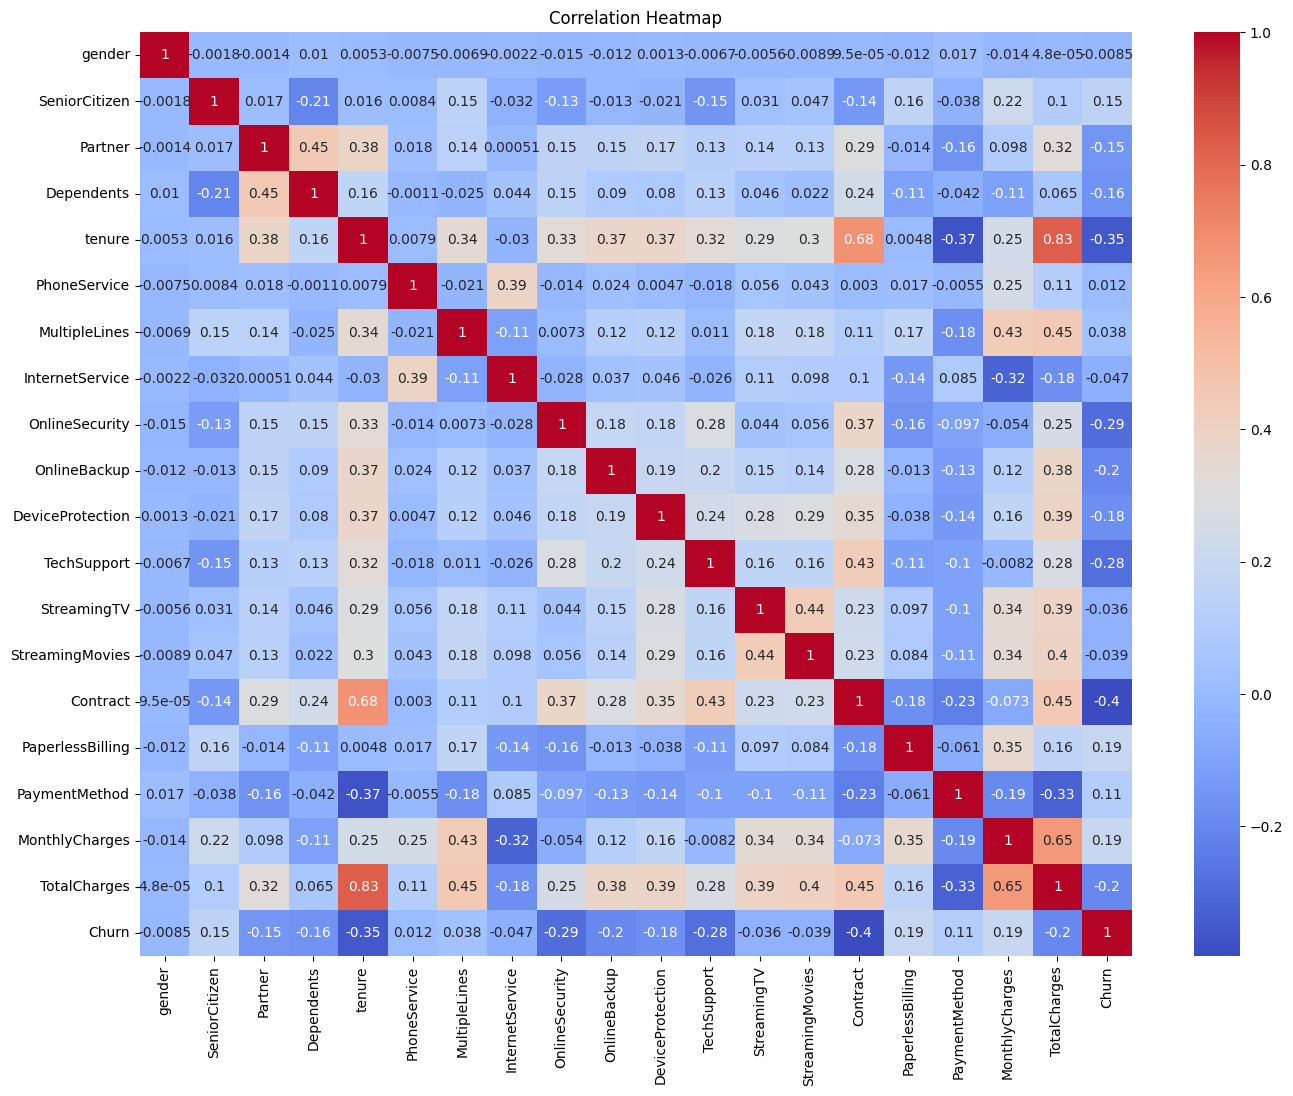

In [54]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

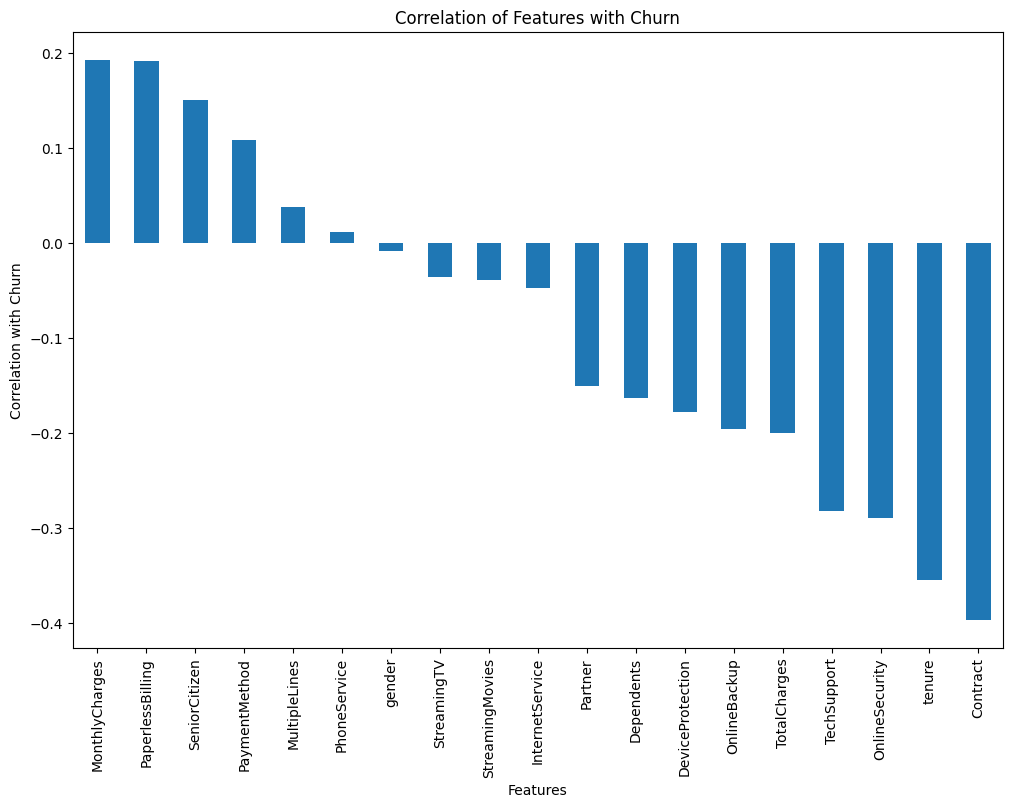

In [55]:
plt.figure(figsize=(12, 8))
df.corr()['Churn'].sort_values(ascending=False).drop('Churn').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Features with Churn')
plt.show()

### Save the correlation values in a json file

In [56]:
df.corr()['Churn'].sort_values(ascending=False).drop('Churn').to_json('../api/churn_correlation.json')

### we remove columns with correlation less than 0.1 or greater than -0.1

In [57]:
df.drop(['MultipleLines', 'PhoneService', 'gender', 'StreamingTV',
        'StreamingMovies', 'InternetService'], axis=1, inplace=True)

In [58]:
df.head()

SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0       1               0             2   
1              0        0           0      34               2             0   
2              0        0           0       2               2             2   
3              0        0           0      45               2             0   
4              0        0           0       2               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  
0           29.85         29.85      0  
1           56.95       1889.50      0  
2           53.85        108.15      1  
3           42.30       1840.75      0  
4           70.70        151.65      1

### check for outliers

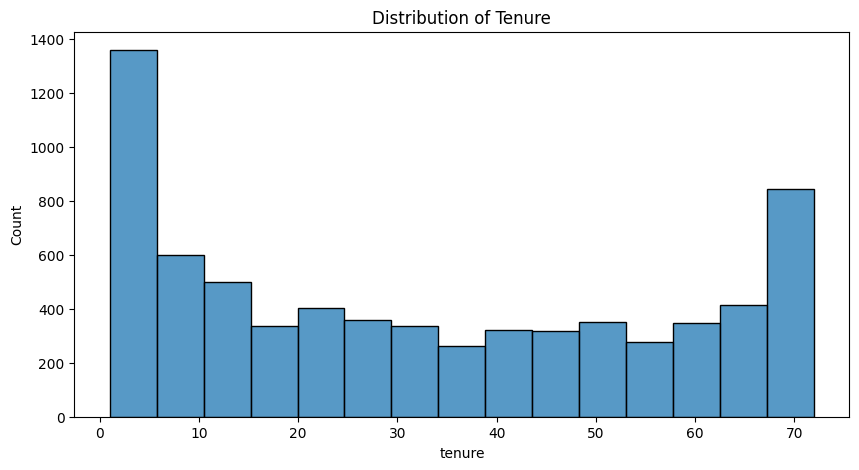

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(df['tenure'])
plt.title('Distribution of Tenure')
plt.show()

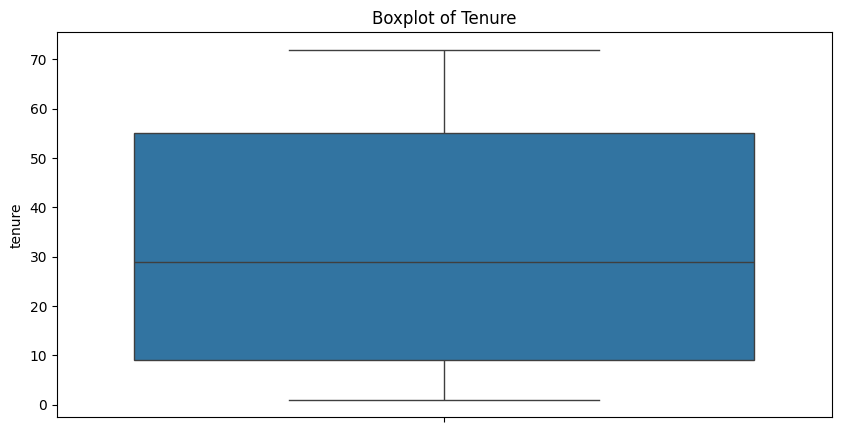

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(df['tenure'])
plt.title('Boxplot of Tenure')
plt.show()


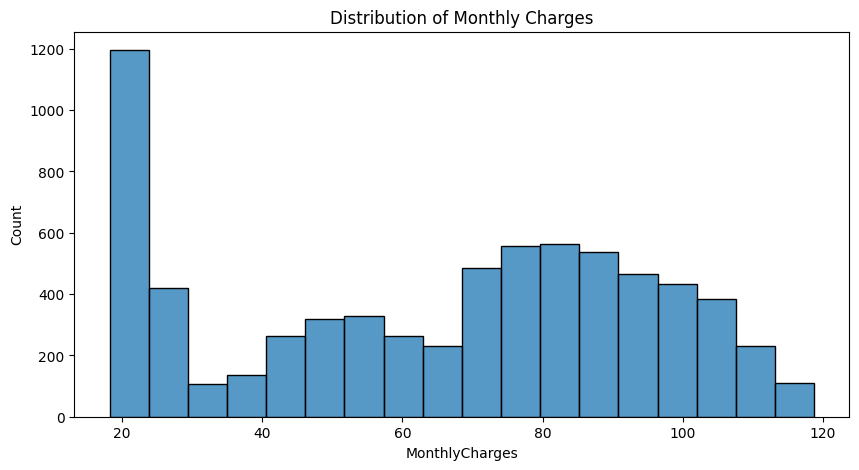

In [61]:
plt.figure(figsize=(10,5))
sns.histplot(df['MonthlyCharges'])
plt.title('Distribution of Monthly Charges')
plt.show()

In [62]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

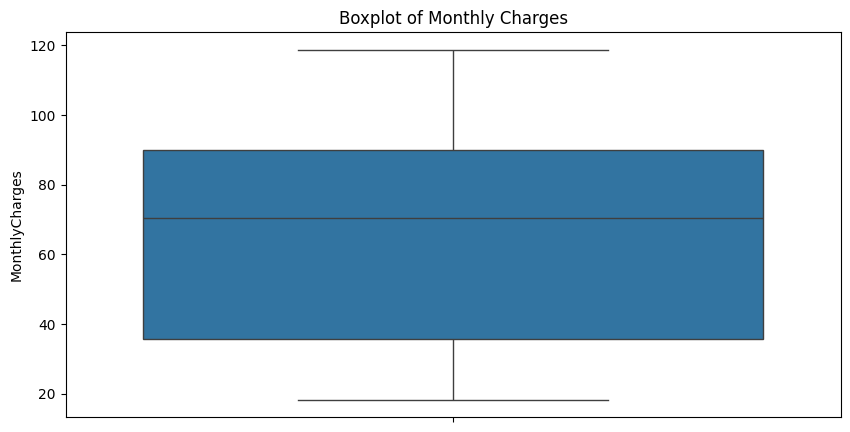

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.show()

### select features

In [64]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

### develop model

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build pipeline

In [66]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

In [67]:
params_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'classifier': [RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), XGBClassifier(), CatBoostClassifier()],
}

In [68]:
grid_search = GridSearchCV(pipeline, params_grid, cv=5, n_jobs=-1, verbose=1,scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Learning rate set to 0.019582
Learning rate set to 0.019582
Learning rate set to 0.019582
Learning rate set to 0.019582
Learning rate set to 0.019582
Learning rate set to 0.019582
Learning rate set to 0.019582
Learning rate set to 0.019582
0:	learn: 0.6809689	total: 56.5ms	remaining: 56.4s
0:	learn: 0.6813147	total: 56.7ms	remaining: 56.6s
0:	learn: 0.6817416	total: 56.7ms	remaining: 56.6s
0:	learn: 0.6814566	total: 56.9ms	remaining: 56.8s
0:	learn: 0.6808905	total: 57.2ms	remaining: 57.2s
1:	learn: 0.6673952	total: 58ms	remaining: 29s
1:	learn: 0.6706869	total: 58.9ms	remaining: 29.4s
1:	learn: 0.6668361	total: 59.8ms	remaining: 29.8s
1:	learn: 0.6683799	total: 59.8ms	remaining: 29.9s
1:	learn: 0.6677604	total: 59.9ms	remaining: 29.9s
2:	learn: 0.6558629	total: 60.9ms	remaining: 20.2s
2:	learn: 0.6580615	total: 61.7ms	remaining: 20.5s
2:	learn: 0.6571191	total: 61.9ms	remaining: 20.6s
2:	learn: 0.6554675	total: 62.7ms	remai

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [RandomForestClassifier(),
                                        GradientBoostingClassifier(),
                                        KNeighborsClassifier(), GaussianNB(),
                                        DecisionTreeClassifier(),
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      cols...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                                        <catboost.core.CatBoostClassifier object at 0x30fc39be0>],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler()]},
             scoring='accuracy', verbose=1)

### Get the best model

In [69]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_scaler = best_params['scaler']
best_classifier = best_params['classifier']

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')
print(f'Best Scaler: {best_scaler}')
print(f'Best Classifier: {best_classifier}')

Best Parameters: {'classifier': GradientBoostingClassifier(), 'scaler': RobustScaler()}
Best Score: 0.8033777777777779
Best Scaler: RobustScaler()
Best Classifier: GradientBoostingClassifier()


In [70]:
best_pipeline = Pipeline([
    ('scaler', best_scaler),
    ('classifier', best_classifier)
])
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', GradientBoostingClassifier())])

## Model Evaluation

In [71]:
y_pred = best_pipeline.predict(X_test)
accuracy = best_pipeline.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy * 100, 2)}%')
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Accuracy: 78.54%
Mean Squared Error: 0.2146410803127221
Mean Absolute Error: 0.2146410803127221
R2 Score: -0.0998390027488596


In [72]:
cv_scores = cross_val_score(best_pipeline, X, y, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy: {cv_scores.mean()}')

Cross-validated accuracy: 0.8026143414203115


### Visualize model performance

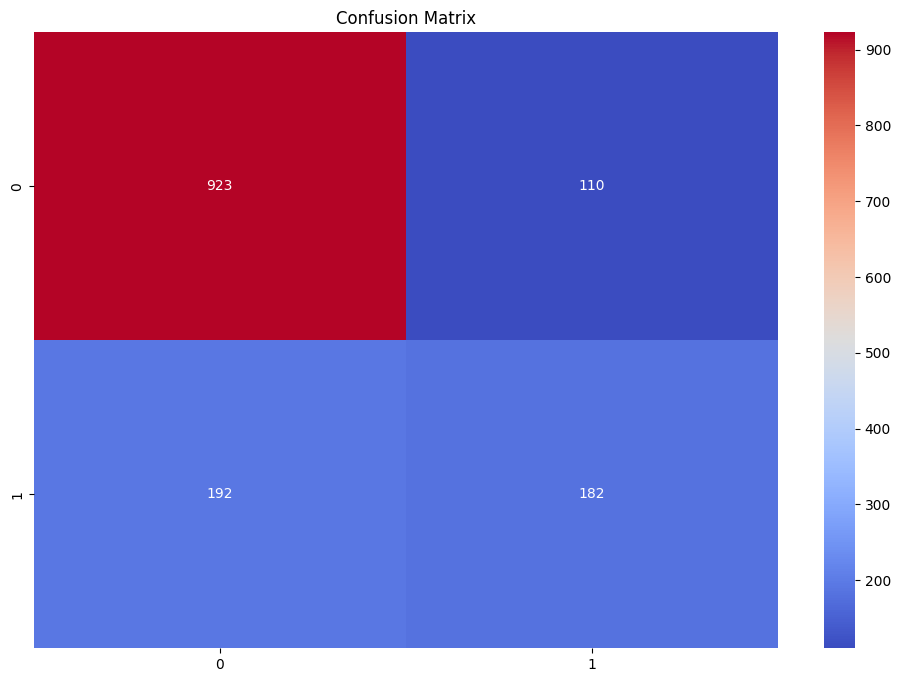

In [73]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.show()

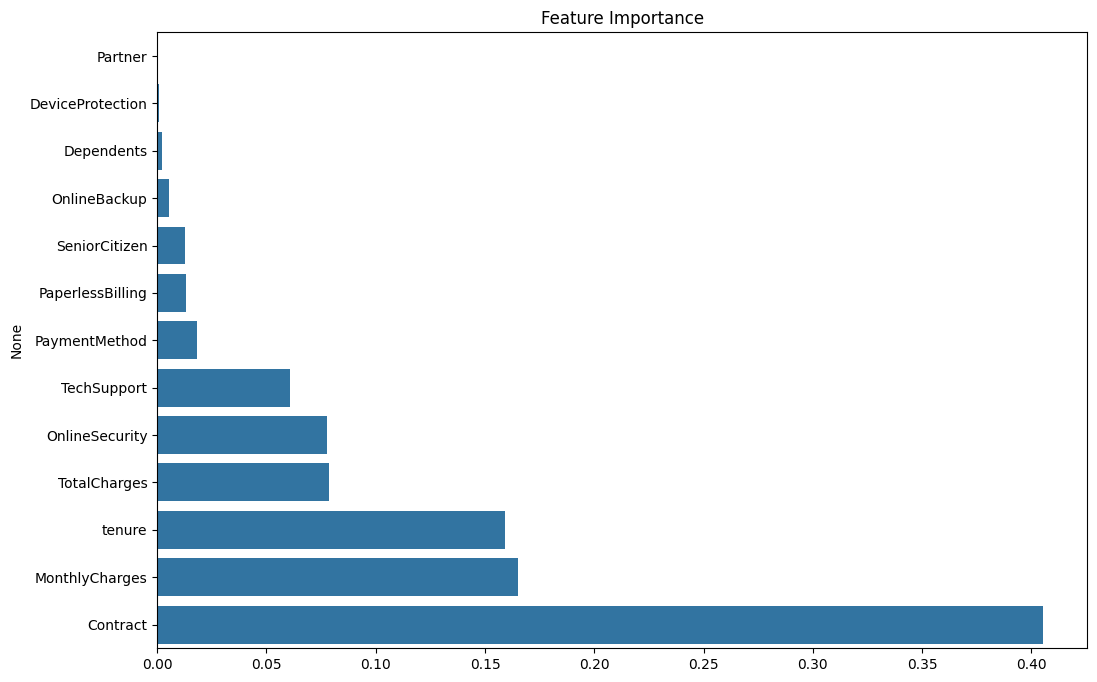

In [74]:
plt.figure(figsize=(12, 8))
feature_importances = best_classifier.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features, order=[
            x for _, x in sorted(zip(feature_importances, features))])
plt.title('Feature Importance')
plt.show()

## Model Conversion

In [75]:
pickle_out = open("classifier.pkl","wb")
pickle.dump(best_pipeline, pickle_out)
pickle_out.close()

In [76]:
best_pipeline.predict([[
    1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 11, 123
]])

/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array([1])

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int64  
 2   Dependents        7032 non-null   int64  
 3   tenure            7032 non-null   int64  
 4   OnlineSecurity    7032 non-null   int64  
 5   OnlineBackup      7032 non-null   int64  
 6   DeviceProtection  7032 non-null   int64  
 7   TechSupport       7032 non-null   int64  
 8   Contract          7032 non-null   int64  
 9   PaperlessBilling  7032 non-null   int64  
 10  PaymentMethod     7032 non-null   int64  
 11  MonthlyCharges    7032 non-null   float64
 12  TotalCharges      7032 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 769.1 KB
